In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
RegularShoes = pd.read_csv('data/RegularShoes.csv',index_col=0)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [2]:
#Numerical Varibles

In [3]:
RegularShoes

,Order Date,Brand,Sneaker Name,Resell Price,Retail Price,Release Date,Shoe Size,Turnover Days,Profit,Profit Ratio,Model,Style,Black,White,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Turnover Weeks,color,release_season,release_year,order_season,order_year
0,2017-09-01,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,1097,220,2016-09-24,11.000000,342.000000,877.000000,3.990000,yeezy-boost-350,adidas-yeezy-boost-350-low-v2-beluga,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,Grey,Fall 2016,2016,Fall 2016,2017
1,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-copper,685,220,2016-11-23,11.000000,282.000000,465.000000,2.110000,yeezy-boost-350,adidas-yeezy-boost-350-v2-core-black-copper,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,Black,Fall 2016,2016,Fall 2016,2017
2,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-green,690,220,2016-11-23,11.000000,282.000000,470.000000,2.140000,yeezy-boost-350,adidas-yeezy-boost-350-v2-core-black-green,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,Black,Fall 2016,2016,Fall 2016,2017
3,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-red,1075,220,2016-11-23,11.500000,282.000000,855.000000,3.890000,yeezy-boost-350,adidas-yeezy-boost-350-v2-core-black-red,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,Black,Fall 2016,2016,Fall 2016,2017
4,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-red-2017,828,220,2017-02-11,11.000000,202.000000,608.000000,2.760000,yeezy-boost-350,adidas-yeezy-boost-350-v2-core-black-red-2017,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,Black,Winter 2017,2017,Fall 2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,565,220,2018-12-26,8.000000,49.000000,345.000000,1.570000,yeezy-boost-350,adidas-yeezy-boost-350-v2-static-reflective,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,White,Winter 2018,2018,Winter 2018,2019
99952,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,598,220,2018-12-26,8.500000,49.000000,378.000000,1.720000,yeezy-boost-350,adidas-yeezy-boost-350-v2-static-reflective,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,White,Winter 2018,2018,Winter 2018,2019
99953,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,605,220,2018-12-26,5.500000,49.000000,385.000000,1.750000,yeezy-boost-350,adidas-yeezy-boost-350-v2-static-reflective,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,White,Winter 2018,2018,Winter 2018,2019
99954,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,650,220,2018-12-26,11.000000,49.000000,430.000000,1.950000,yeezy-boost-350,adidas-yeezy-boost-350-v2-static-reflective,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,White,Winter 2018,2018,Winter 2018,2019


In [4]:
#Numerical Data

In [5]:
def grab_columns(RegularShoes, cat_th=10, car_th = 20):
    cat_col = [col for col in RegularShoes.columns if RegularShoes[col].dtypes == "O"]
    num_but_cat = [col for col in RegularShoes.columns if RegularShoes[col].dtypes != "O" and RegularShoes[col].nunique() < cat_th]
    cat_but_car = [col for col in RegularShoes.columns if RegularShoes[col].dtypes == "O" and RegularShoes[col].nunique() > car_th]
    
    cat_col = cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]
    
    num_col = [col for col in RegularShoes.columns if RegularShoes[col].dtypes != "O" and col not in num_but_cat]
    
    print("----- Categorical Columns -----")
    print(cat_col)
    print("----- Numerical Columns -----")
    print(num_col)
    print("----- Cardinal Columns -----")
    print(cat_but_car)
    return cat_col,num_col,cat_but_car

In [6]:
cat_col, num_col,cat_but_car = grab_columns(RegularShoes)

----- Categorical Columns -----
['Brand', 'Model', 'color', 'release_season', 'order_season', 'Retail Price', 'Black', 'White', 'Grey', 'Red', 'Green', 'Neo', 'Orange', 'Tan/Brown', 'Pink', 'Blue', 'Colorful', 'release_year', 'order_year']
----- Numerical Columns -----
['Resell Price', 'Shoe Size', 'Turnover Days', 'Profit', 'Profit Ratio', 'Turnover Weeks']
----- Cardinal Columns -----
['Order Date', 'Sneaker Name', 'Release Date', 'Style']


In [7]:
def numerical_analysis(RegularShoes,col,plot=False):
    print("Analysis For {}".format(col))
    quan = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(RegularShoes[col].describe(quan))
    if plot:
        plt.figure(figsize= (10,10))
        sns.histplot(RegularShoes[col],kde=True)
        plt.title(col)
        plt.xticks(rotation = 45)
        plt.show(block=True)
    print("--------------------------------")

Analysis For Resell Price
count   72761.000000
mean      455.147455
std       243.654007
min       186.000000
1%        226.000000
5%        250.000000
10%       260.000000
20%       273.000000
30%       300.000000
40%       360.000000
50%       385.000000
60%       420.000000
70%       500.000000
80%       595.000000
90%       720.000000
95%       850.000000
99%      1510.000000
max      4050.000000
Name: Resell Price, dtype: float64


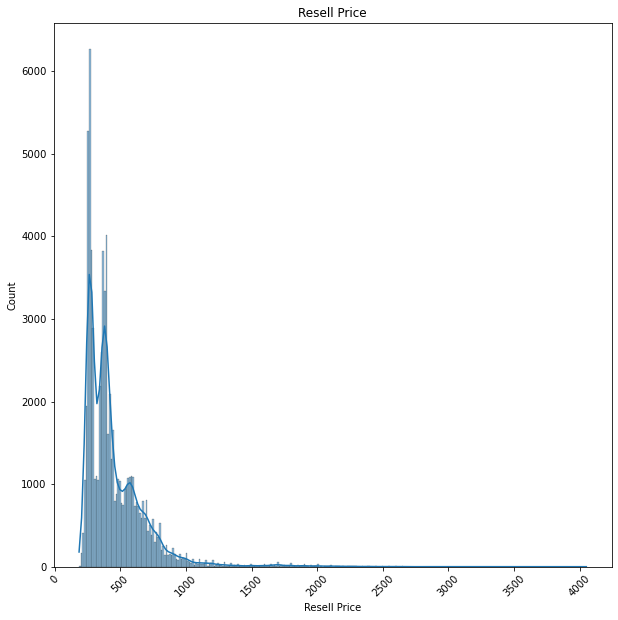

--------------------------------
Analysis For Shoe Size
count   72761.000000
mean        9.329201
std         2.346595
min         3.500000
1%          4.000000
5%          5.000000
10%         5.500000
20%         7.000000
30%         8.500000
40%         9.000000
50%         9.500000
60%        10.000000
70%        10.500000
80%        11.000000
90%        12.000000
95%        13.000000
99%        14.000000
max        17.000000
Name: Shoe Size, dtype: float64


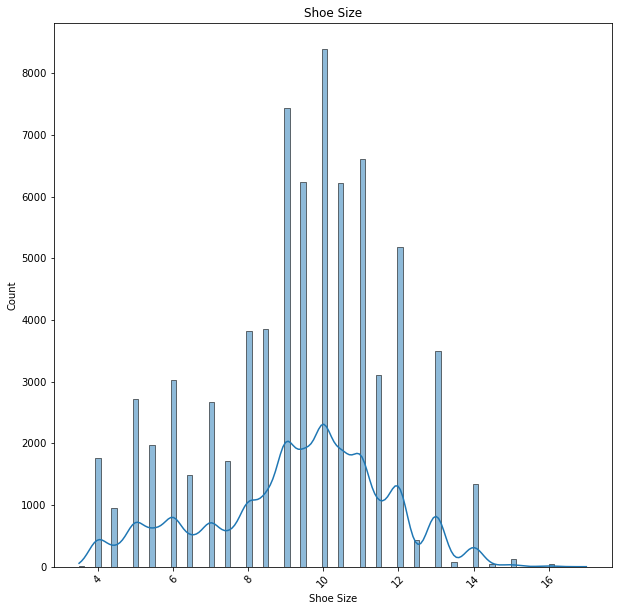

--------------------------------
Analysis For Turnover Days
count   68235.000000
mean       72.141540
std        87.915304
min        -3.000000
1%         -2.000000
5%          1.000000
10%         3.000000
20%         7.000000
30%        13.000000
40%        22.000000
50%        35.000000
60%        51.000000
70%        78.000000
80%       129.000000
90%       212.000000
95%       280.000000
99%       351.000000
max       367.000000
Name: Turnover Days, dtype: float64


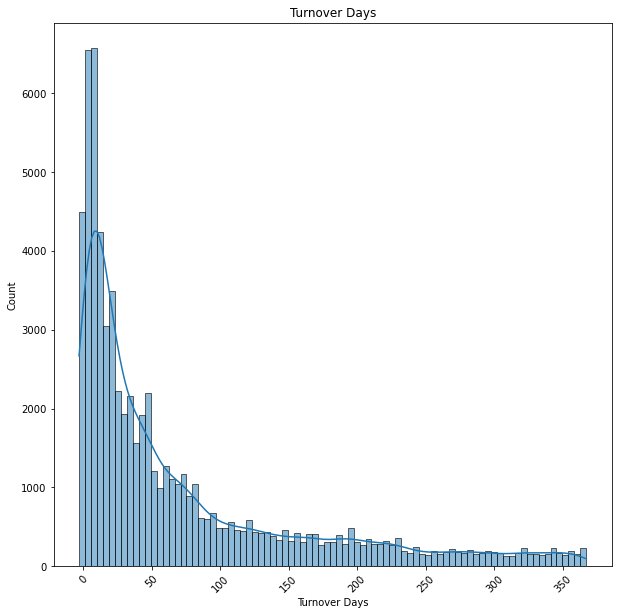

--------------------------------
Analysis For Profit
count   72638.000000
mean      249.687271
std       254.553450
min       -34.000000
1%         10.000000
5%         30.000000
10%        40.000000
20%        55.000000
30%        95.000000
40%       145.000000
50%       170.000000
60%       206.000000
70%       301.900000
80%       409.000000
90%       545.000000
95%       670.000000
99%      1340.000000
max      3860.000000
Name: Profit, dtype: float64


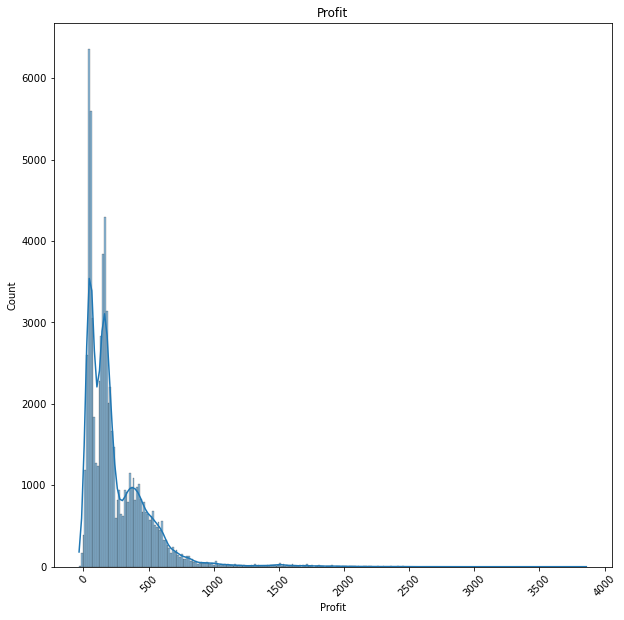

--------------------------------
Analysis For Profit Ratio
count   72595.000000
mean        1.333542
std         1.482116
min        -0.150000
1%          0.050000
5%          0.140000
10%         0.190000
20%         0.250000
30%         0.460000
40%         0.680000
50%         0.790000
60%         0.980000
70%         1.380000
80%         2.380000
90%         3.270000
95%         3.940000
99%         7.530000
max        20.320000
Name: Profit Ratio, dtype: float64


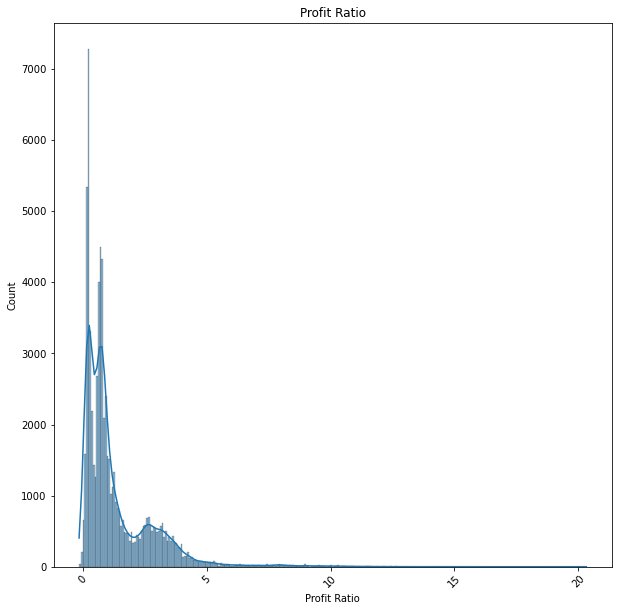

--------------------------------
Analysis For Turnover Weeks
count   60584.000000
mean       11.618893
std        12.751879
min         1.000000
1%          1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         3.000000
40%         4.000000
50%         6.000000
60%         9.000000
70%        13.000000
80%        21.000000
90%        32.000000
95%        41.000000
99%        50.000000
max        52.000000
Name: Turnover Weeks, dtype: float64


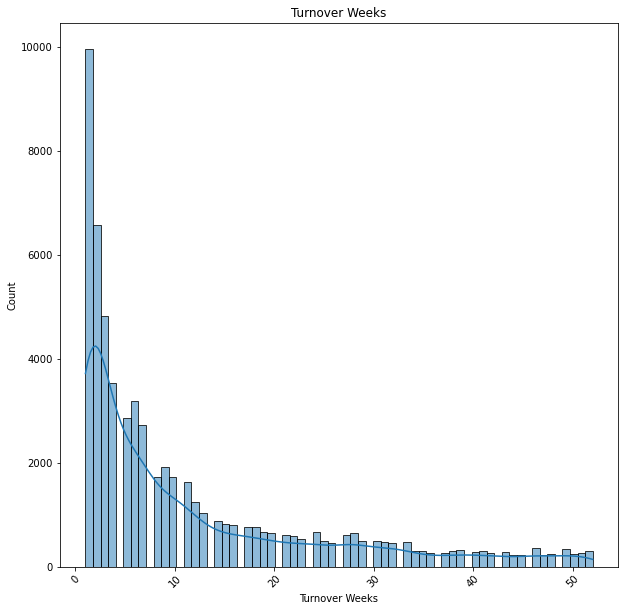

--------------------------------


In [8]:
for col in num_col:
    numerical_analysis(RegularShoes,col,plot=True)

In [9]:
#CATEGORICAL VARIABLES

In [10]:
def categorical_analysis(RegularShoes,col,plot=False):
    print("Analysis For {}".format(col))
    print(pd.DataFrame({col:RegularShoes[col].value_counts(),
                       "Ratio":100*RegularShoes[col].value_counts()/len(RegularShoes)}))
    
    if plot:
        plt.figure(figsize=(10,10))
        sns.countplot(x=RegularShoes[col],data=RegularShoes)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show(block=True)
        
    print("-----------------------------------")

Analysis For Brand
           Brand     Ratio
 Yeezy     47923 65.863581
Off-White  24838 34.136419


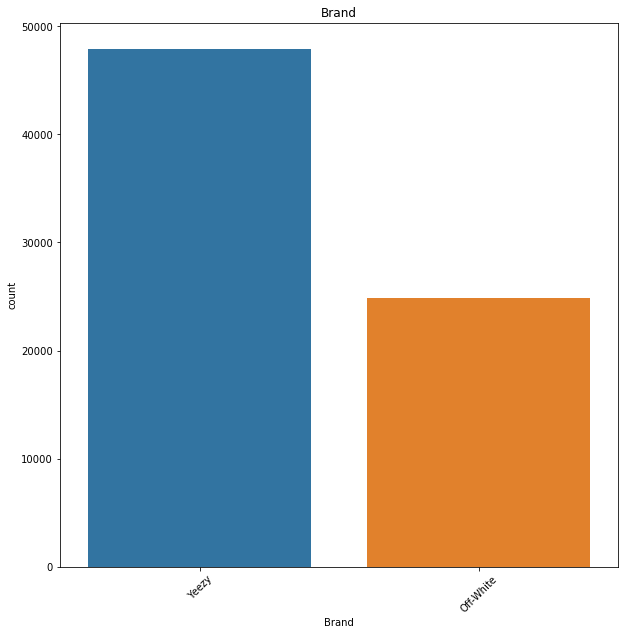

-----------------------------------
Analysis For Model
                              Model     Ratio
yeezy-boost-350               47923 65.863581
zoom-fly                       4289  5.894641
air-presto                     4175  5.737964
air-jordan-1-retro-high        3688  5.068649
blazer-mid                     3478  4.780033
air-vapormax                   3256  4.474925
air-force-1                    2429  3.338327
air-max-90                     1733  2.381770
air-max-97                     1347  1.851266
react-hyperdunk-2017-flyknit    443  0.608843


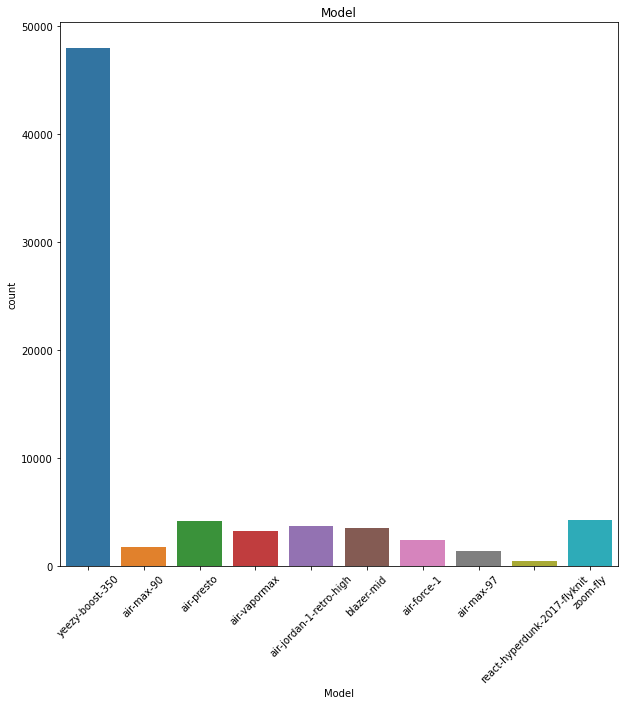

-----------------------------------
Analysis For color
           color     Ratio
Black      34541 47.471860
White      28138 38.671816
Grey        6137  8.434464
Orange      2028  2.787207
Tan/Brown    560  0.769643


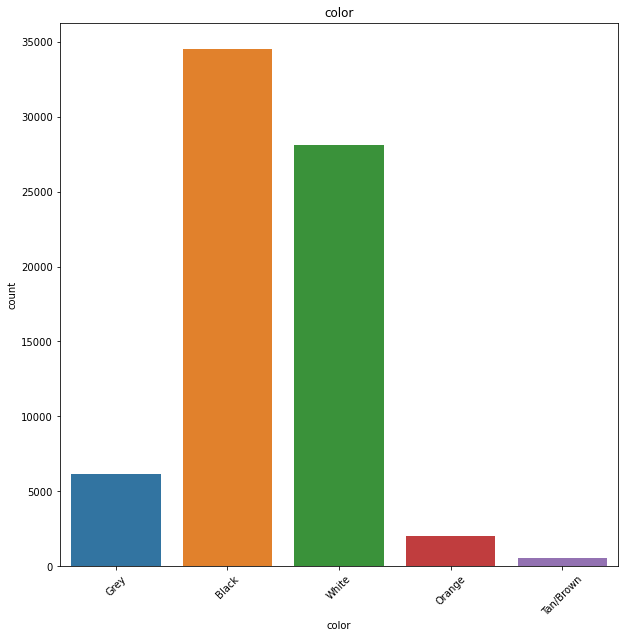

-----------------------------------
Analysis For release_season
             release_season     Ratio
Summer 2018           19446 26.725856
Fall 2017             15961 21.936202
Fall 2018             11411 15.682852
Winter 2017           10304 14.161433
Winter 2018            9865 13.558087
Spring 2018            3081  4.234411
Spring 2017            1262  1.734446
Winter 2019            1172  1.610753
Fall 2016               132  0.181416
Winter 2016             127  0.174544


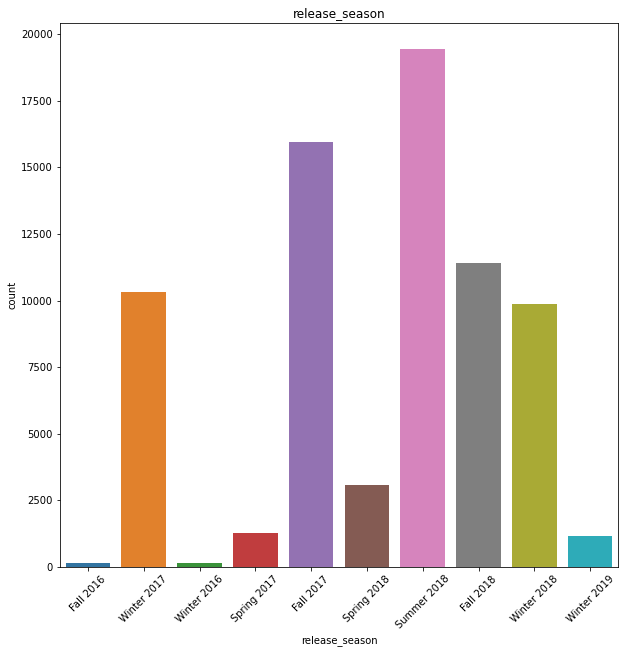

-----------------------------------
Analysis For order_season
             order_season     Ratio
Winter 2018         19074 26.214593
Summer 2018         13475 18.519537
Winter 2017         13100 18.004151
Fall 2018            9527 13.093553
Fall 2017            7173  9.858303
Spring 2017          4660  6.404530
Summer 2017          2594  3.565097
Spring 2018          1727  2.373524
Winter 2019          1172  1.610753
Fall 2016             236  0.324350
Winter 2016            23  0.031610


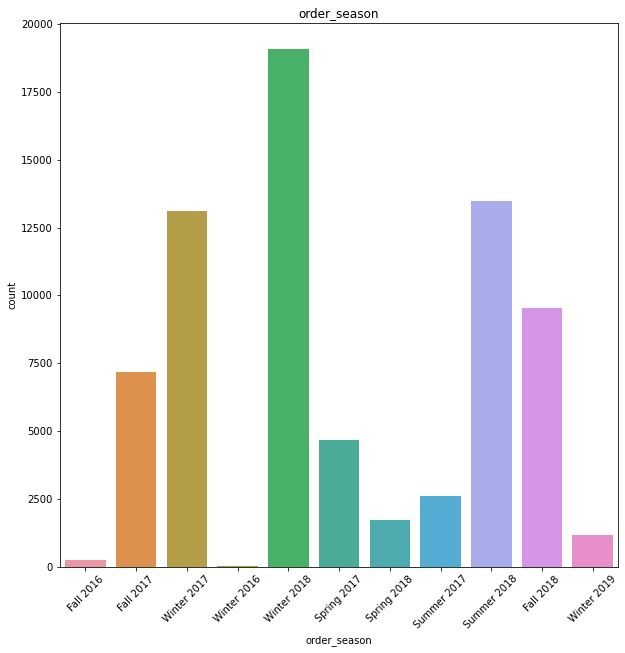

-----------------------------------
Analysis For Retail Price
     Retail Price     Ratio
220         47923 65.863581
160          5908  8.119734
170          5386  7.402317
190          5035  6.919916
130          3478  4.780033
250          3256  4.474925
200          1744  2.396888
150            31  0.042605


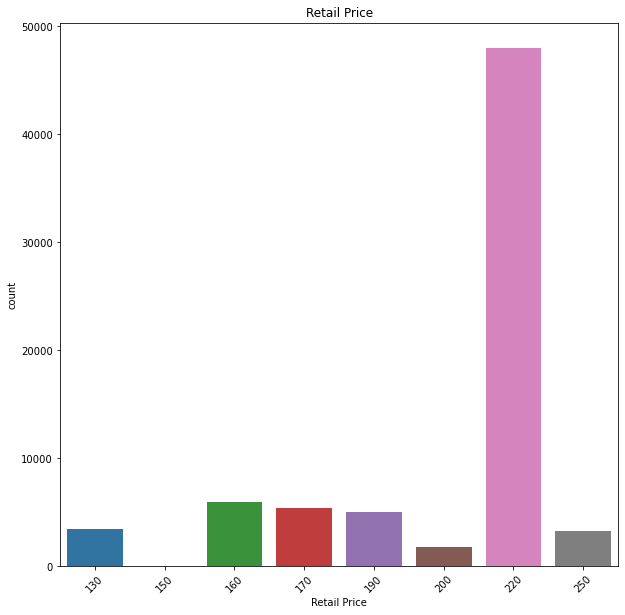

-----------------------------------
Analysis For Black
          Black     Ratio
0.000000  38220 52.528140
1.000000  34541 47.471860


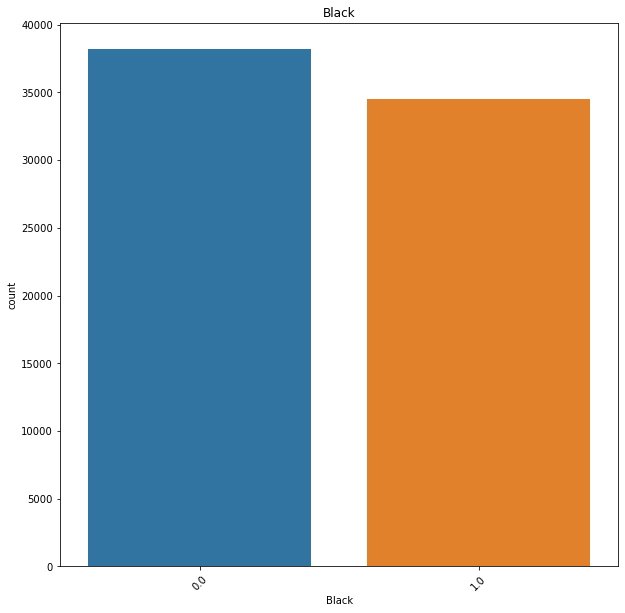

-----------------------------------
Analysis For White
          White     Ratio
0.000000  42417 58.296340
1.000000  30344 41.703660


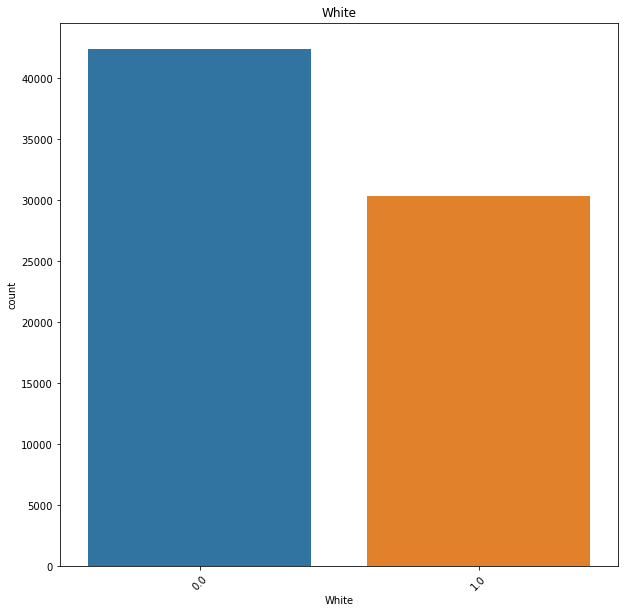

-----------------------------------
Analysis For Grey
           Grey     Ratio
0.000000  47921 65.860832
1.000000  24840 34.139168


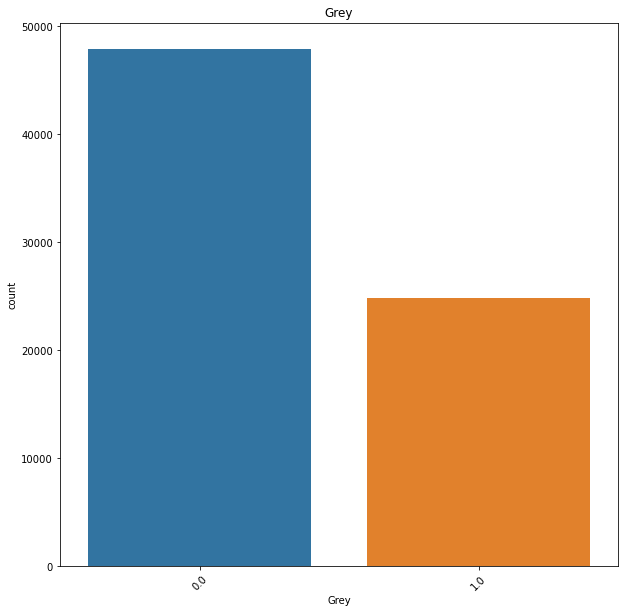

-----------------------------------
Analysis For Red
            Red     Ratio
0.000000  71749 98.609145
1.000000   1012  1.390855


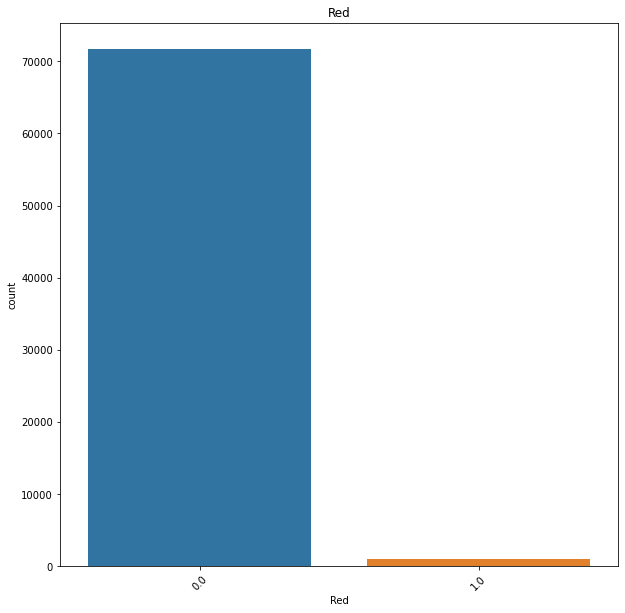

-----------------------------------
Analysis For Green
          Green     Ratio
0.000000  72729 99.956020
1.000000     32  0.043980


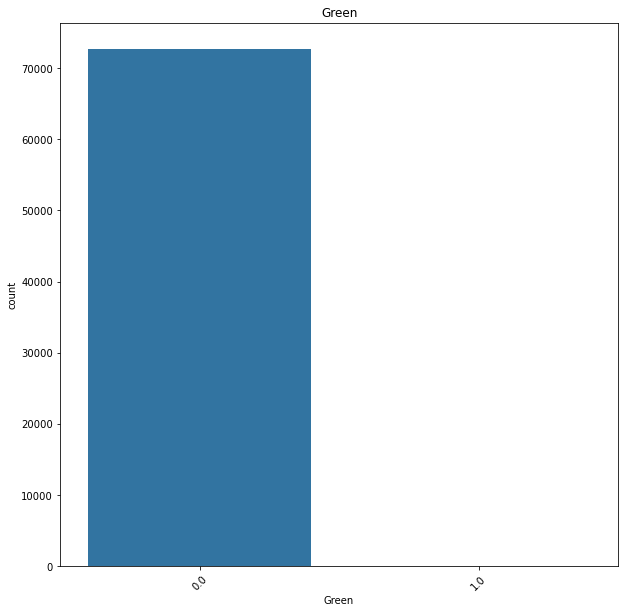

-----------------------------------
Analysis For Neo
            Neo     Ratio
0.000000  70094 96.334575
1.000000   2667  3.665425


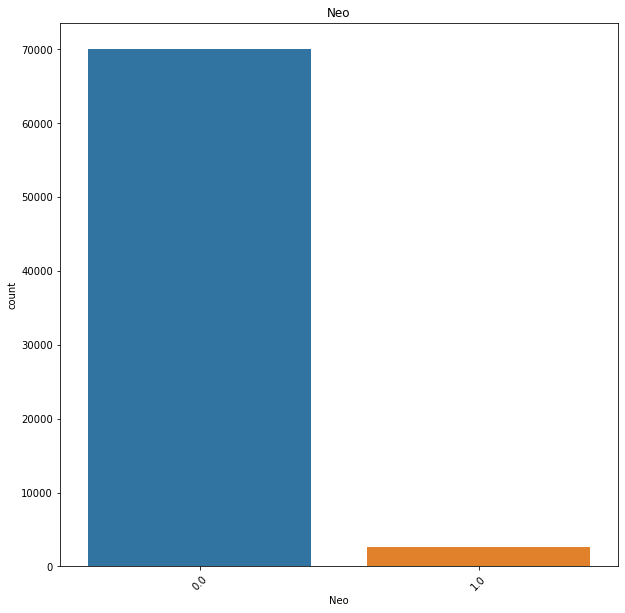

-----------------------------------
Analysis For Orange
          Orange     Ratio
0.000000   70678 97.137203
1.000000    2083  2.862797


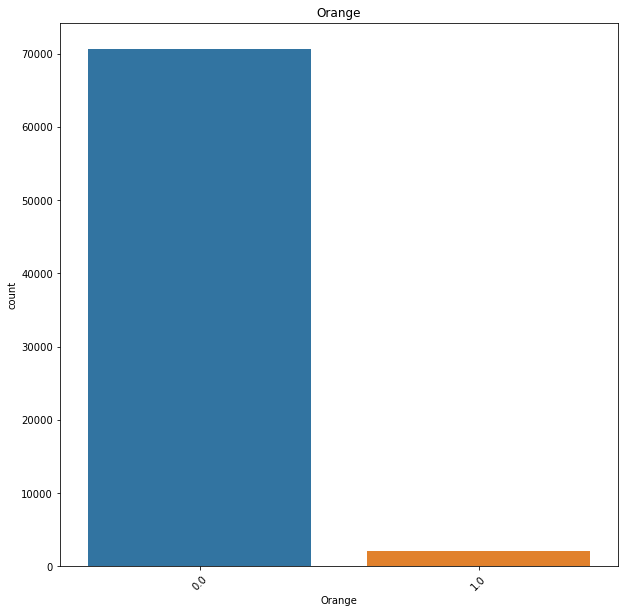

-----------------------------------
Analysis For Tan/Brown
          Tan/Brown     Ratio
0.000000      71640 98.459339
1.000000       1121  1.540661


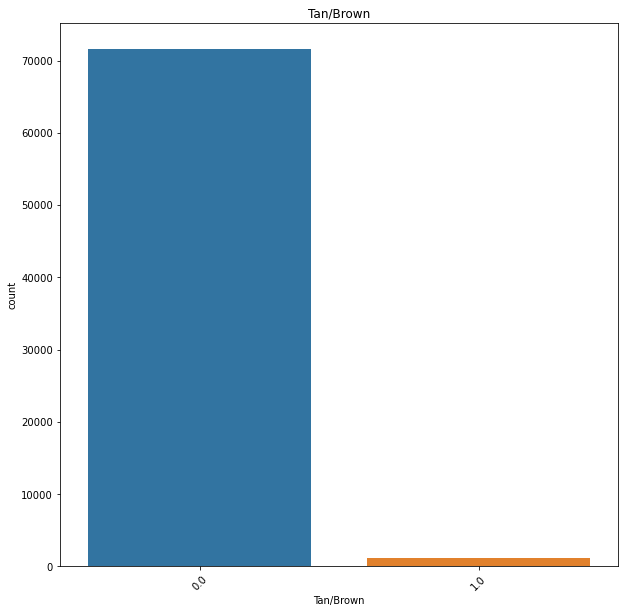

-----------------------------------
Analysis For Pink
           Pink     Ratio
0.000000  70905 97.449183
1.000000   1856  2.550817


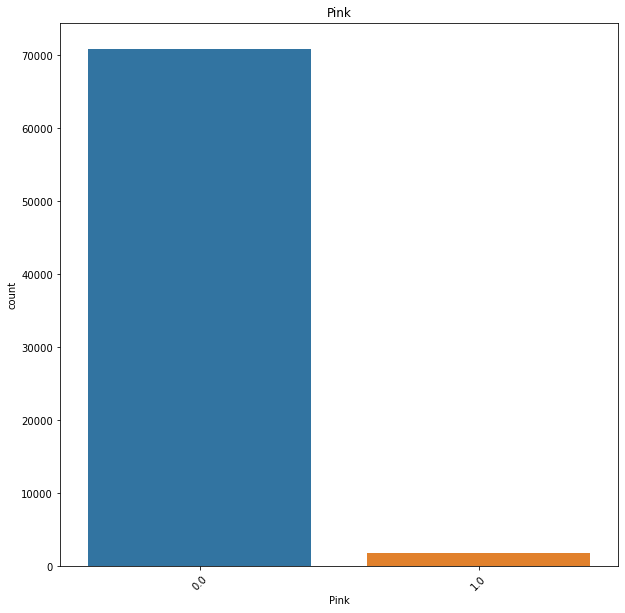

-----------------------------------
Analysis For Blue
           Blue     Ratio
0.000000  69460 95.463229
1.000000   3301  4.536771


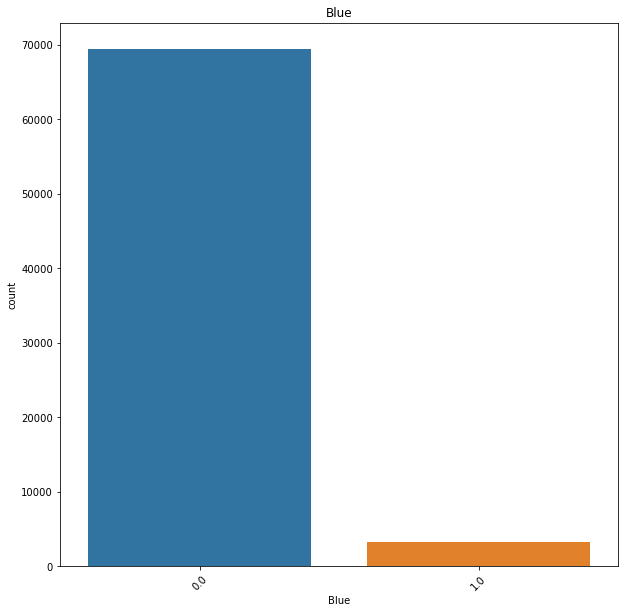

-----------------------------------
Analysis For Colorful
          Colorful     Ratio
0.000000     45518 62.558239
1.000000     27243 37.441761


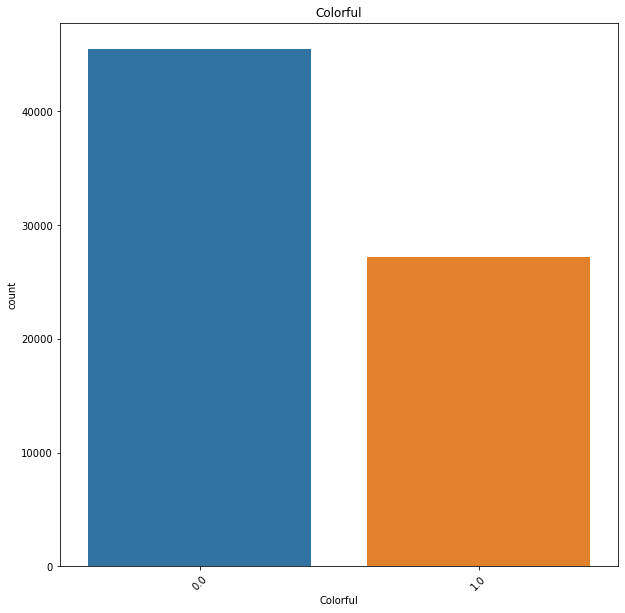

-----------------------------------
Analysis For release_year
      release_year     Ratio
2018         43803 60.201207
2017         27527 37.832080
2019          1172  1.610753
2016           259  0.355960


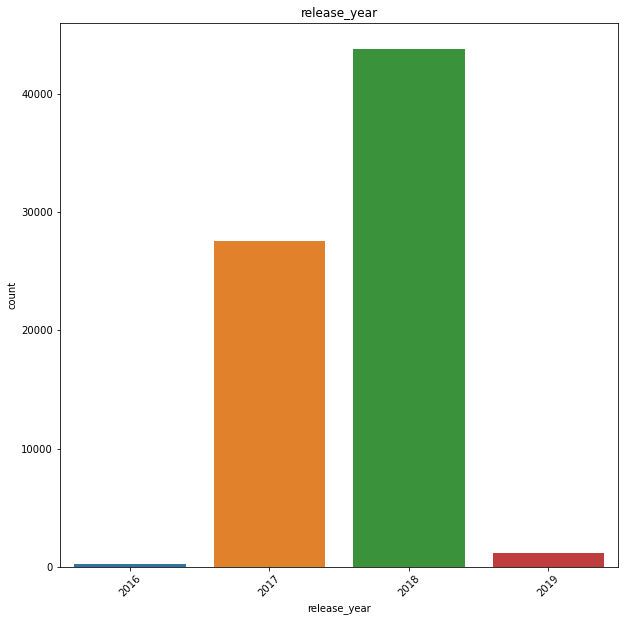

-----------------------------------
Analysis For order_year
      order_year     Ratio
2018       48184 66.222289
2017       12915 17.749893
2019       11662 16.027817


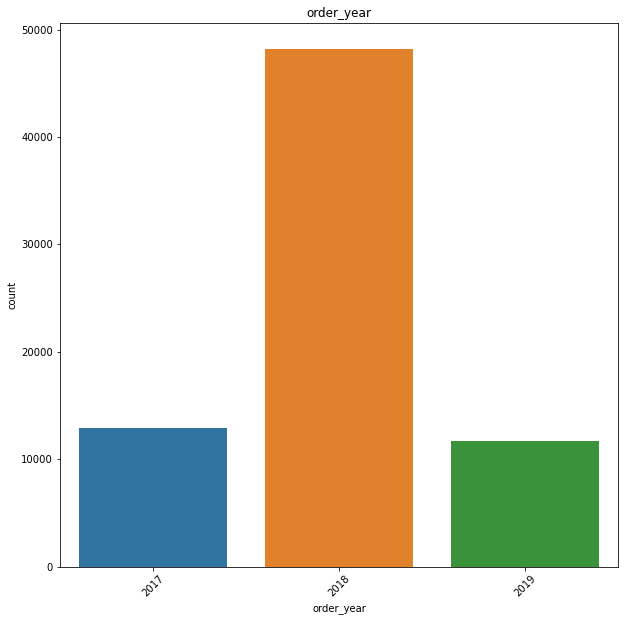

-----------------------------------


In [11]:
for col in cat_col:
    categorical_analysis(RegularShoes,col,plot=True)

In [12]:
# DEALING WITH OUTLIERS

<AxesSubplot:>

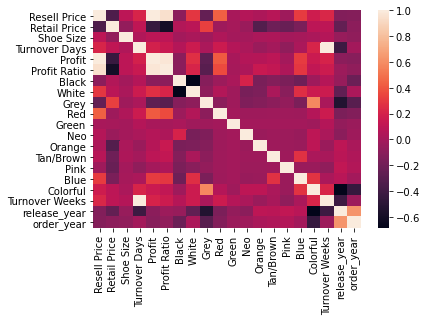

In [13]:
correlations = RegularShoes.corr()
sns.heatmap(correlations)